In [ ]:
!pip install farasapy
!pip install arabic-reshaper
!pip install python-bidi

In [ ]:
from farasa.pos import FarasaPOSTagger #Farasa for Arabic POS
import networkx as nx  # Is used to draw the network X grahp and word connection
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
import re

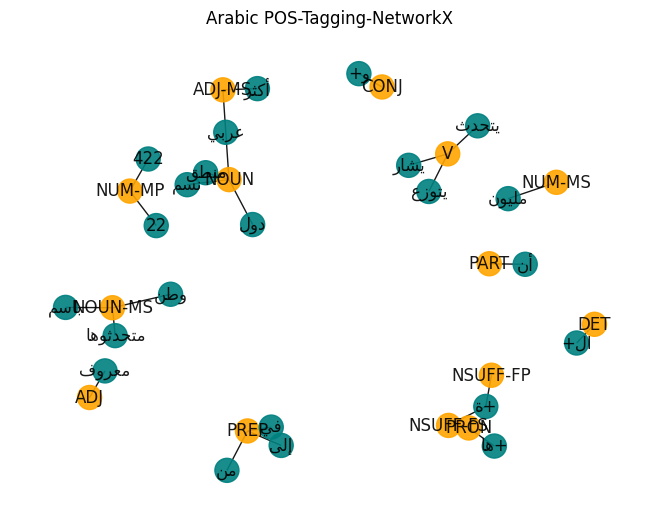

In [ ]:


class POS_Tagging:
    def __init__(self, text) -> None:
        self.text = text
        self.pos_tagged = None
        self.tags_set = set()

    def POS_Tag(self):
        """
        Extract POS Tagging
        """
        pos_tagger = FarasaPOSTagger()
        self.pos_tagged = pos_tagger.tag_segments(text, combine_subtokens=True)

        for pos in self.pos_tagged:
            for tag in pos.tags:
                self.tags_set.add(tag)

    def draw_graph(self):
        """
        Draw the POS-Tagging using NetworkX
        """
        # Create a graph
        G = nx.Graph()

        # Create tags as nodes
        for tag in self.tags_set:
            G.add_node(tag)

        # add edges to the graph
        for pos in self.pos_tagged:
            for i in range(len(pos.tokens)):
                word = pos.tokens[i]
                tag = pos.tags[i]
                # Arabic text preprocessing
                reshaped_word = arabic_reshaper.reshape(word)
                arword = get_display(reshaped_word)

                for node in G.copy().nodes():
                    if tag == node:
                        G.add_edge(tag, arword)

        # draw the graph
        plt.figure()
        pos = nx.spring_layout(G, k=0.3)

        color_map = []
        for node in G:
            if re.search('[a-zA-Z]', node) :
                color_map.append('orange')
            else:
                color_map.append('teal')

        nx.draw(G, pos, node_color=color_map, with_labels=True, alpha=0.9)
        plt.title("Arabic POS-Tagging-NetworkX")  # set title

        # showing the graph
        plt.axis('off')
        plt.show()

if __name__ == '__main__':
    text = """
 يُشار إلى أن العربية يتحدثها أكثر من 422 مليون نسمة ويتوزع متحدثوها في المنطقة المعروفة باسم الوطن العربي فى اكثر من 22 دولة

"""

    pos_tagger = POS_Tagging(text)
    pos_tagger.POS_Tag()
    pos_tagger.draw_graph()

In [ ]:
pos_tagger = FarasaPOSTagger()
pos_tagged = pos_tagger.tag_segments(text, combine_subtokens=True)

In [ ]:
pos_tagged

[('يشار', (['V'],)),
 ('إلى', (['PREP'],)),
 ('أن', (['PART'],)),
 ('اللغة', (['DET'], ['NOUN'], ['NSUFF', ('F', 'S')])),
 ('العربية', (['DET'], ['ADJ'], ['NSUFF', ('F', 'S')])),
 ('يتحدث', (['V'],)),
 ('ها', (['PRON'],)),
 ('أكثر', (['ADJ', ('M', 'S')],)),
 ('من', (['PREP'],)),
 ('422', (['NUM', ('M', 'P')],)),
 ('مليون', (['NUM', ('M', 'S')],)),
 ('نسمة', (['NOUN'], ['NSUFF', ('F', 'S')])),
 ('و', (['CONJ'],)),
 ('يتوزع', (['V'],)),
 ('متحدثوها', (['NOUN', ('M', 'S')],)),
 ('في', (['PREP'],)),
 ('المنطقة', (['DET'], ['NOUN'], ['NSUFF', ('F', 'S')])),
 ('المعروفة', (['DET'], ['ADJ'], ['NSUFF', ('F', 'P')])),
 ('باسم', (['NOUN', ('M', 'S')],)),
 ('الوطن', (['DET'], ['NOUN', ('M', 'S')])),
 ('العربي', (['DET'], ['ADJ', ('M', 'S')]))]